Makes connectivity matrices for use in supplementary movies showing effect of resampling cell populations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import sys
import os

In [ ]:
# set location of ALVariability/
file_path = '../../ALVariability/analysis/make_connectivity_matrices.ipynb'
project_dir = os.path.join(file_path.split('ALVariability')[0], 'ALVariability')

sys.path.append(project_dir)
from utils.plot_utils import plot_scaled_hmap, set_font_sizes
from utils.make_vols import adjust_glomerular_synapses_AL_block, plot_comparison_cones

set_font_sizes()

In [3]:
# read in table of neurons and connectivity matrix
df_neur_ids = pd.read_csv(os.path.join(project_dir, 'connectomics/hemibrain_v1_2/df_neur_ids.csv'), index_col=0)
al_block = pd.read_csv(os.path.join(project_dir, 'connectomics/hemibrain_v1_2/AL_block.csv'), index_col=0)
al_block.columns = al_block.columns.astype(np.int64)
al_block.index = al_block.index.astype(np.int64)

In [4]:
og_orn_order = df_neur_ids[df_neur_ids.altype == 'ORN'].bodyId.values
og_ln_order = df_neur_ids[df_neur_ids.altype == 'LN'].bodyId.values
og_upn_order = df_neur_ids[df_neur_ids.altype == 'uPN'].bodyId.values
og_mpn_order = df_neur_ids[df_neur_ids.altype == 'mPN'].bodyId.values

In [5]:
def resample_ORNs():
    random_ORN_sample = []
    orn_gloms = df_neur_ORNs.glom.unique() 
    for g in orn_gloms:
        glom_orn_bodyIds = df_neur_ORNs[df_neur_ORNs.glom == g].bodyId.values
        random_glom_ORN_sample = np.random.choice(glom_orn_bodyIds, len(glom_orn_bodyIds), replace=True)
        random_ORN_sample.append(random_glom_ORN_sample)
    random_ORN_sample = np.concatenate(random_ORN_sample)
    return random_ORN_sample

def resample_LNs():
    LN_ids = og_ln_order.copy()
    random_LN_sample = np.random.choice(LN_ids, len(LN_ids), replace=True)
        
    df_neur_LNs['LN_order'] = np.arange(len(df_neur_LNs))
    random_LN_sample_sorted_by_neurId = (df_neur_LNs
        .set_index('bodyId')
        .loc[random_LN_sample]
        .sort_values('LN_order', ascending=True)
        ).index.values
    return random_LN_sample_sorted_by_neurId
    
def resample_PNs():
    # resample within PN glomeruli to get random uPN sample
    random_uPN_sample = []
    pn_gloms = df_neur_PNs.glom.unique() 
    for g in pn_gloms:
        glom_pn_bodyIds = df_neur_PNs[df_neur_PNs.glom == g].bodyId.values
        random_glom_PN_sample = np.random.choice(glom_pn_bodyIds, len(glom_pn_bodyIds), replace=True)
        random_uPN_sample.append(random_glom_PN_sample)
    final_upn_order = np.concatenate(random_uPN_sample)
    
    mpn_bodyIds = df_neur_PNs[df_neur_PNs.altype == 'mPN'].bodyId.values
    final_mpn_order = np.random.choice(mpn_bodyIds, len(mpn_bodyIds), replace=True)
    # concatenate
    final_PN_ids = np.concatenate((final_upn_order, final_mpn_order))
    return final_upn_order, final_mpn_order

In [6]:
# set save directory

# get time tag
n = datetime.now()
day_tag = '{}_{}_{}'.format(n.year, n.month, n.day)

plot_dir = 'connectivity_matrices_' + day_tag + '/'
# make directory if doesn't exist already
if not os.path.isdir(plot_dir):
    os.makedirs(plot_dir)

In [9]:
# number of matrices to include per set
# (to be used later in gif)
n_mats = 10

# specify which schemes of variation to include
# columns: ORN resampling, LN resampling, PN resampling, PN synapse density
# i.e. [1, 0, 0, 0] resamples ORNs only
# and [1, 1, 1, 0] resamples ORNs, LNs, PNs, but no PN synapse density variation
member_array = np.array([
         [1, 0, 0, 0], 
         [0, 1, 0, 0],
         [0, 0, 1, 0],
         [0, 0, 0, 1],
         [1, 1, 1, 0],
         [1, 1, 1, 1]]).T

member_array = np.repeat(member_array, n_mats, 1).T

resample_ORN_conmat_0


../../ALVariability\utils\plot_utils.py:63: RuntimeWarning: divide by zero encountered in log10
  sns.heatmap(np.log10(mat), ax=ax,


resample_ORN_conmat_1
resample_ORN_conmat_2
resample_ORN_conmat_3
resample_ORN_conmat_4
resample_ORN_conmat_5
resample_ORN_conmat_6
resample_ORN_conmat_7
resample_ORN_conmat_8
resample_ORN_conmat_9
resample_LN_conmat_10
resample_LN_conmat_11
resample_LN_conmat_12
resample_LN_conmat_13
resample_LN_conmat_14
resample_LN_conmat_15
resample_LN_conmat_16
resample_LN_conmat_17
resample_LN_conmat_18
resample_LN_conmat_19
resample_PN_conmat_20
resample_PN_conmat_21
resample_PN_conmat_22
resample_PN_conmat_23
resample_PN_conmat_24
resample_PN_conmat_25
resample_PN_conmat_26
resample_PN_conmat_27
resample_PN_conmat_28
resample_PN_conmat_29
resample_PN_densityconmat_30
resample_PN_densityconmat_31
resample_PN_densityconmat_32
resample_PN_densityconmat_33
resample_PN_densityconmat_34
resample_PN_densityconmat_35
resample_PN_densityconmat_36
resample_PN_densityconmat_37
resample_PN_densityconmat_38
resample_PN_densityconmat_39
resample_ORN_LN_PN_conmat_40
resample_ORN_LN_PN_conmat_41
resample_ORN_L

MemoryError: Unable to allocate 24.6 MiB for an array with shape (25745476,) and data type bool

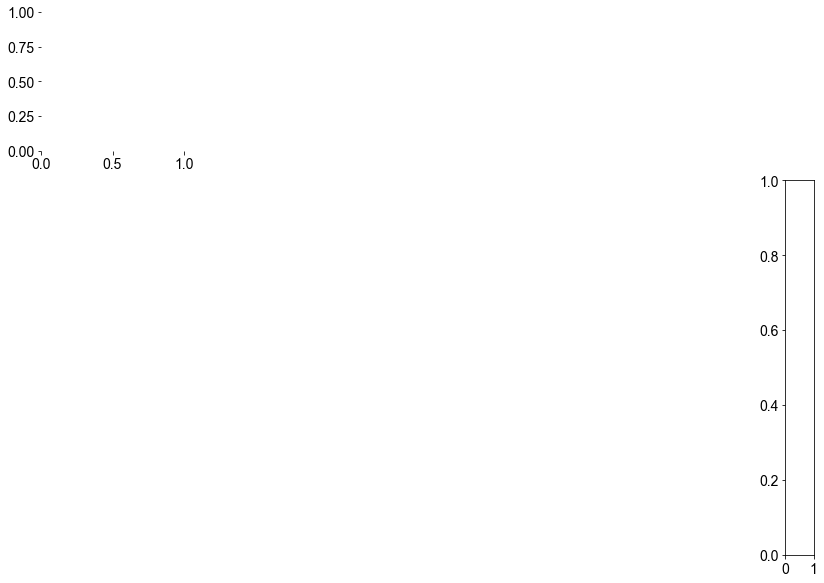

In [11]:
df_neur_ORNs = df_neur_ids.copy()[df_neur_ids.altype == 'ORN']
df_neur_LNs = df_neur_ids.copy()[df_neur_ids.altype == 'LN']
df_neur_PNs = df_neur_ids.copy()[df_neur_ids.altype.isin(['uPN', 'mPN'])]

for im in range(member_array.shape[0]):
    # specify what operations to do on the connectivity matrix
    cur_row = member_array[im]
    RESAMPLE_ORNs, RESAMPLE_LNs, RESAMPLE_PNs, ADJUST_PN_INPUTS = cur_row
    
    # get original ordering/IDs of all cell types
    final_ORN_ids = df_neur_ORNs.bodyId.values
    final_LN_ids = df_neur_LNs.bodyId.values
    final_upn_order = og_upn_order.copy()
    final_mpn_order = og_mpn_order.copy()
    final_PN_ids = np.concatenate((final_upn_order, final_mpn_order))
    
    savetag = 'resample_'
    
    # do resampling
    if RESAMPLE_ORNs:
        final_ORN_ids = resample_ORNs()
        savetag += 'ORN_'
    if RESAMPLE_LNs:
        final_LN_ids = resample_LNs()
        savetag += 'LN_'
    if RESAMPLE_PNs:
        final_upn_order, final_mpn_order = resample_PNs()
        savetag += 'PN_'
            
    # get final bodyIds as a result of resampling
    final_bodyIds = np.concatenate((final_ORN_ids, final_LN_ids, final_upn_order, final_mpn_order))
    df_neur_ids_resampled = df_neur_ids.set_index('bodyId').loc[final_bodyIds].reset_index()[df_neur_ids.columns]

    # and, reorder al_block
    al_block.columns = al_block.columns.astype(np.int64)
    al_block_resampled = al_block.copy().loc[final_bodyIds, final_bodyIds]

    # add PN synapse density variation if desired
    if ADJUST_PN_INPUTS:
        al_block_resampled = adjust_glomerular_synapses_AL_block(df_neur_ids_resampled, al_block_resampled)
        savetag += 'PN_density'
    
    savetag += 'conmat_' + '{}'.format(im)
    print(savetag)
    
    # plot   
    fig = plt.figure(figsize=(13,13))
    plot_scaled_hmap(fig=fig,
                     conmat = al_block_resampled,
                     neur_sets = [final_ORN_ids, final_LN_ids, final_upn_order, final_mpn_order],
                     neur_set_names = ['ORN', 'LN', 'uPN', 'mPN'],
                     cmap='plasma_r')
    plt.savefig(os.path.join(plot_dir, savetag + '.png'), 
                #dpi=400, bbox_inches='tight')
                dpi=40, bbox_inches='tight')
    plt.close()